# Orthogonal Matching Pursuit (OMP)
## A Lossy Audio Compression Approach

This notebook uses a **non-parallel version** of the OMP algorithm.

Set the directory where the audio signals are stored.

In [1]:
# wave directory and files listing
import os
wavedir = 'audio/oboe/'
wavelist = os.listdir(wavedir)

Read all audio signals stored at the selected directory.

In [2]:
# audio data reading
from scipy.io import wavfile
data = []
for audiofile in wavelist:
    data.append(wavfile.read(wavedir + audiofile)[1])

Convert the signals into an array data type.

In [3]:
# transformation from list to array
import numpy as np
data = np.asarray(data)
data.shape

(773, 52920)

Transpose the data matrix to force each signal (previously represented over each row) to be an "atom" (column).

In [4]:
# transposition (each column is an 'atom')
data = np.transpose(data)
data.shape

(52920, 773)

Randomly selects different atoms to compose the Directory.

In [5]:
# randomly selects different atoms to compose the Dictionary
import random
selectedAtoms = random.sample(range(1, data.shape[1]), 700)
D = data[:,selectedAtoms]
D.shape

(52920, 700)

Reshape the Dictionary to have more atoms over the Dictionary than elements per atom, i.e., to have more columns than rows.

In [6]:
# reshape the Dictionary to have a better distribution of atoms (columns)
D = np.reshape(D, [5292, 7000])
D.shape

(5292, 7000)

Normalize the Dictionary, forcing the values to be between 0 and 1.

In [7]:
# normalize D
from sklearn.preprocessing import normalize
D = normalize(D, axis=1, norm='l2')

Randomly selects one of the atoms from the Dictionary to be a Signal to be represented using the OMP algorithm.

In [8]:
randomAtom = np.random.randint(0, D.shape[1]+1)
s = D[:,randomAtom]
s

array([-0.00118058, -0.00028613,  0.01283148, ..., -0.00347682,
       -0.00365674,  0.00354123])

Import the OMP function (implemented externaly) and apply it with the Dictionary (D) and the signal (s), considering a given sparsity (k).

In [11]:
from omp import omp

k = 5

cs = omp(D[:,:], s, k)

[1.]
[1. 0.]
[ 1.00000000e+00 -4.02199671e-17 -3.95682812e-17]
[ 1.00000000e+00  1.26426907e-16 -1.69405790e-16  4.76462589e-17]
[ 1.00000000e+00 -2.16010844e-16 -2.15684769e-16  1.10119649e-16
  1.65009916e-17]


Multiply the Dictionary (D) by the array of coefficients (cs) to generate the recovered signal (rs).

In [10]:
rs = np.matmul(D, cs)
rs.shape

(5292, 1)

Plot the original signal (s) and the recovered signal (rs).

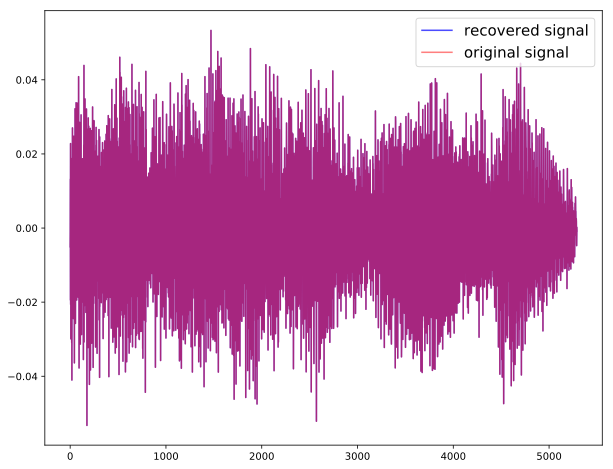

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['figure.figsize'] = (10,8)

plt.plot(rs, 'b', alpha=0.7, label='recovered signal')
plt.plot(s, 'r', alpha=0.5, label='original signal')
plt.legend(loc=1, prop={'size': 15})
plt.show()

Calculate the Mean Squared Error (MSE) for the original signal (s) and the recovered signal (rs).

In [12]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(rs, s)
print(MSE)

1.4843284332742503e-34


Calculate the OMP for the recovered signal (rs) using the same Dictionary (D) that was used to generate the sparse representation coefficients (cs) and a given sparsity (k) to check if we get the original signal from it.

In [13]:
%%time

z = omp(D, rs, k)

[   1    2    3 ... 6996 6997 6998]
CPU times: user 578 ms, sys: 22.9 ms, total: 601 ms
Wall time: 578 ms


Generate a gaussian noise and add to the original signal (s), creating a noisy signal (ns).

In [14]:
from numpy.random import sample
sample = len(s)
noise = 0.05 * np.random.normal(0,1,sample)
#print(noise)

ns = s + noise
#print(noisy_S)

Plot the original signal (s) and the noisy signal (ns).

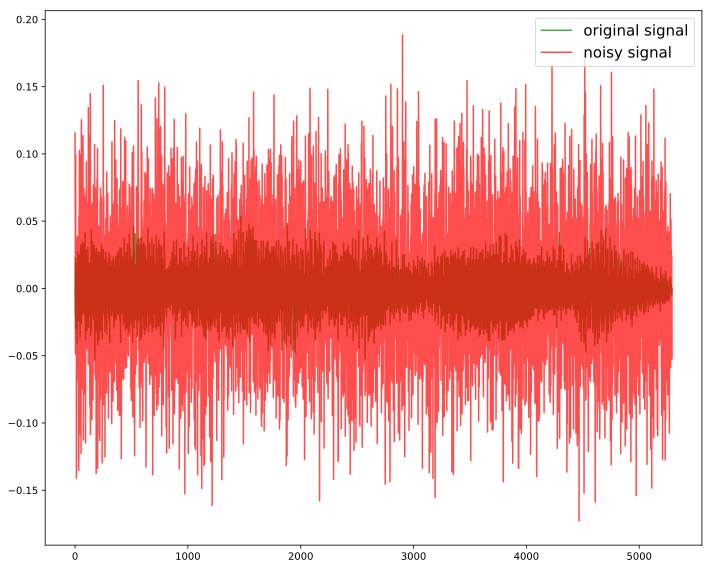

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['figure.figsize'] = (10,8)

plt.plot(s, 'g', alpha=0.7, label='original signal')
plt.plot(ns, 'r', alpha=0.7, label='noisy signal')
plt.legend(loc=1, prop={'size': 15})
plt.tight_layout()
plt.show()

#plt.savefig("test.svg")

Apply OMP to the noisy signal (ns) using a Dictionary (D) with a given sparsity (k) to find the coefficients (cns) for a sparse representation.

In [16]:
%%time

cns = omp(D, ns, k)

[   1    2    3 ... 6996 6997 6998]
CPU times: user 580 ms, sys: 66.1 ms, total: 646 ms
Wall time: 567 ms


Multiply the Dictionary (D) by the coefficients (cns), both used for the sparse representation, to obtain the recovered noisy signal (rns).

In [17]:
rns = np.matmul(D, cns)

Plot the original signal (s) and the recovered noisy signal (rns).

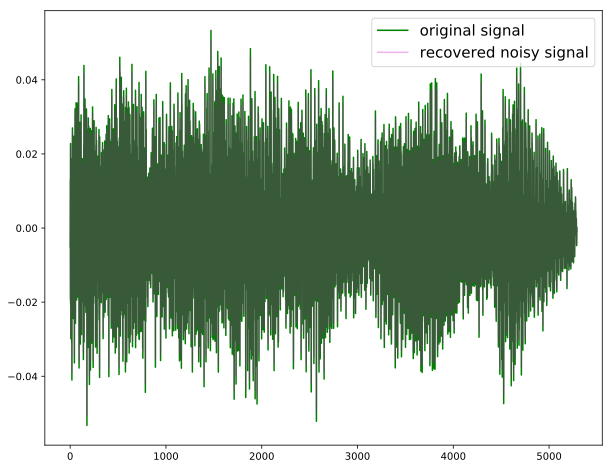

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['figure.figsize'] = (10,8)

plt.plot(s, 'g', alpha=1, label='original signal')
plt.plot(rns, 'm', alpha=0.3, label='recovered noisy signal')
plt.legend(loc=1, prop={'size': 15})
plt.show()

Plot the difference between the original signal (s) and the recovered noisy signal (rns).

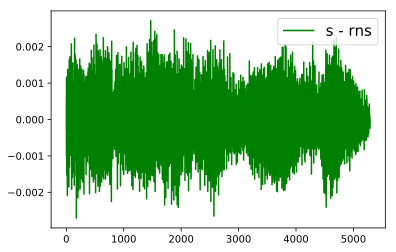

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(s-np.squeeze(rns), 'g', alpha=1, label='s - rns')
plt.legend(loc=1, prop={'size': 15})
plt.show()

Calculate the MSE for the original signal (s) and the recovered noisy signal (rns).

In [20]:
MSE = mean_squared_error(s, rns)
print(MSE)

6.206367451120131e-07
